### Name: Paras Rupani
### ID  : 8961758

# Midterm Part B: California Housing Prices Prediction

### Importing Required Libraries

In [103]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split


### Reading the Dataset

In [104]:
df = pd.read_csv("./housing_dataset.csv")

### Exploratory Data Analysis

In [105]:
len(df)

20640

In [106]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.74     39.71                16.0        255.0            73.0  \
1    -117.02     36.40                19.0        619.0           239.0   
2    -117.86     34.24                52.0        803.0           267.0   
3    -123.17     40.31                36.0         98.0            28.0   
4    -118.33     34.15                39.0        493.0           168.0   

   population  households  median_income  median_house_value ocean_proximity  
0        85.0        38.0         1.6607             14999.0          INLAND  
1       490.0       164.0         2.1000             14999.0          INLAND  
2       628.0       225.0         4.1932             14999.0          INLAND  
3        18.0         8.0         0.5360             14999.0          INLAND  
4       259.0       138.0         2.3667             17500.0       <1H OCEAN

In [107]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age     11
total_rooms            15
total_bedrooms        207
population             19
households             14
median_income           8
median_house_value     80
ocean_proximity       154
dtype: int64

## Apply the whiskers approach to identify outlier rows.

In [108]:
# Calculate the quartiles
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound_whisker = Q1 - 1.5 * IQR
upper_bound_whisker = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['median_house_value'] < lower_bound_whisker) | (df['median_house_value'] > upper_bound_whisker)]

# Print the outliers
print("Number of Outliers:", len(outliers))

outliers

Number of Outliers: 1072


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
19568    -118.37     33.81                33.0       5057.0           790.0  \
19569    -117.19     32.69                35.0       2921.0           438.0   
19570    -117.87     33.60                34.0       3415.0           779.0   
19571    -118.59     34.14                19.0       1303.0           155.0   
19572    -122.18     37.81                30.0        292.0            38.0   
...          ...       ...                 ...          ...             ...   
20635    -118.90     34.14                35.0       1503.0           263.0   
20636    -118.69     34.18                11.0       1177.0           138.0   
20637    -118.80     34.19                 4.0      15572.0          2222.0   
20638    -118.69     34.21                10.0       3663.0           409.0   
20639    -118.85     34.27                50.0        187.0            33.0   

       population  households  median_income  median_house_value   
19568      2021.0       748.0         6.8553            482200.0  \
19569      1042.0       415.0         6.3612            482700.0   
19570      1275.0       718.0         4.4980            482900.0   
19571       450.0       145.0        10.5511            483100.0   
19572       126.0        52.0         6.3624            483300.0   
...           ...         ...            ...                 ...   
20635       576.0       216.0         5.1457            500001.0   
20636       415.0       119.0        10.0472            500001.0   
20637      5495.0      2152.0         8.6499            500001.0   
20638      1179.0       371.0        12.5420            500001.0   
20639       130.0        35.0         3.3438            500001.0   

      ocean_proximity  
19568      NEAR OCEAN  
19569      NEAR OCEAN  
19570       <1H OCEAN  
19571       <1H OCEAN  
19572        NEAR BAY  
...               ...  
20635       <1H OCEAN  
20636       <1H OCEAN  
20637       <1H OCEAN  
20638       <1H OCEAN  
20639       <1H OCEAN  

[1072 rows x 10 columns]

### Apply Z-score normalization and choose appropriate threshold to match the outliers from the whiskers approach

In [109]:
# Initialize variables to store the best matching threshold and difference in outlier counts
best_threshold = None
min_diff = float('inf')
outliers_z_score_count = 0
outliers_whisker_count = 0

# Iterate through various values between -3 and 3 for z_score_threshold
for z_score_threshold in range(-300, 301):
    z_score_threshold /= 100.0  # Convert to float with increments of 0.01
    # Calculate Z-score for median_house_value
    df['z_score'] = (df['median_house_value'] - df['median_house_value'].mean()) / df['median_house_value'].std()

    # Identify outliers based on the chosen threshold
    outliers_z_score = df[abs(df['z_score']) > z_score_threshold]
    outliers_z_score_count = len(outliers_z_score)

    # Count outliers detected by whiskers approach within the Z-score range
    outliers_within_range = df[(df['median_house_value'] < lower_bound_whisker - 3 * z_score_threshold) |
                               (df['median_house_value'] > upper_bound_whisker + 3 * z_score_threshold)]
    outliers_whisker_count = len(outliers_within_range)

    # Calculate the difference in outlier counts
    diff = abs(outliers_z_score_count - outliers_whisker_count)

    # Update the best threshold if the difference is minimized
    if diff < min_diff:
        min_diff = diff
        best_threshold = z_score_threshold

outliers_z_score_count = len(df[abs(df['z_score']) > best_threshold])

# Print the best matching threshold
print("Best matching threshold:", best_threshold)

# Print number of outliers for both approaches
print("Number of outliers using Z-score approach:", outliers_z_score_count)
print("Number of outliers using whiskers approach:", outliers_whisker_count)


Best matching threshold: 2.38
Number of outliers using Z-score approach: 1072
Number of outliers using whiskers approach: 1072


In [110]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.74     39.71                16.0        255.0            73.0  \
1    -117.02     36.40                19.0        619.0           239.0   
2    -117.86     34.24                52.0        803.0           267.0   
3    -123.17     40.31                36.0         98.0            28.0   
4    -118.33     34.15                39.0        493.0           168.0   

   population  households  median_income  median_house_value ocean_proximity   
0        85.0        38.0         1.6607             14999.0          INLAND  \
1       490.0       164.0         2.1000             14999.0          INLAND   
2       628.0       225.0         4.1932             14999.0          INLAND   
3        18.0         8.0         0.5360             14999.0          INLAND   
4       259.0       138.0         2.3667             17500.0       <1H OCEAN   

    z_score  
0 -1.667374  
1 -1.667374  
2 -1.667374  
3 -1.667374  
4 -1.645693

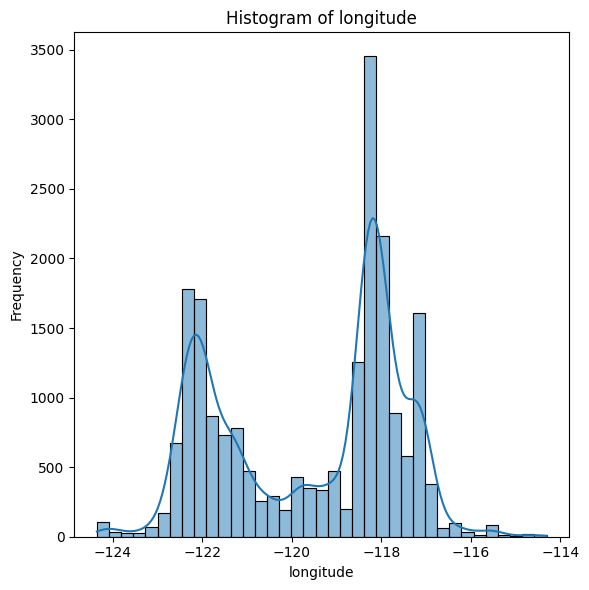

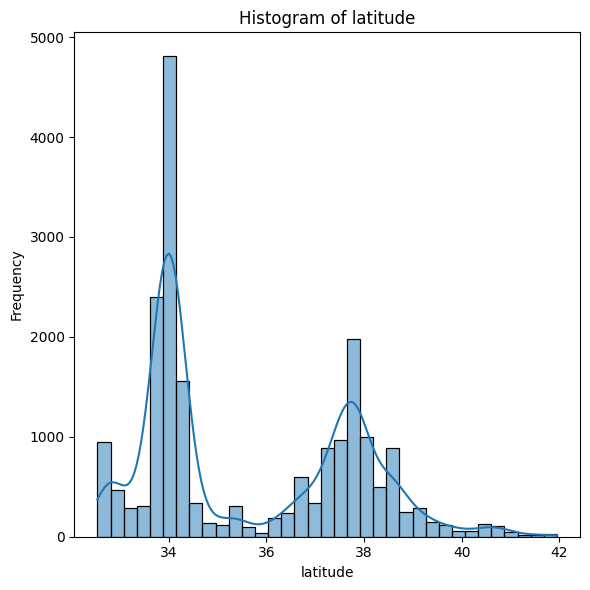

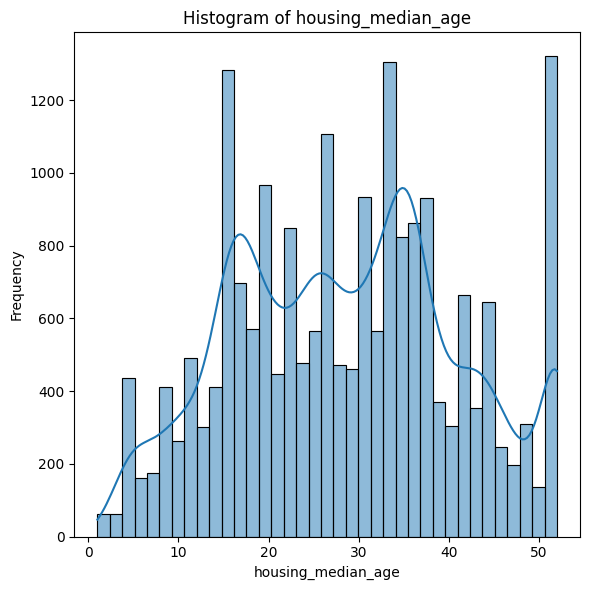

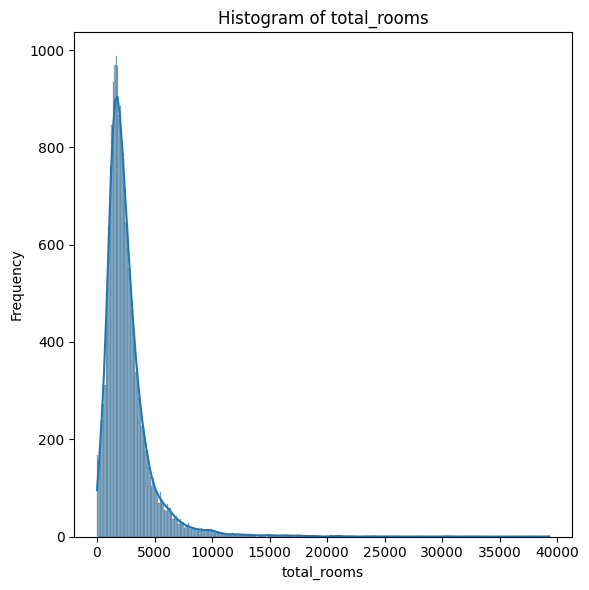

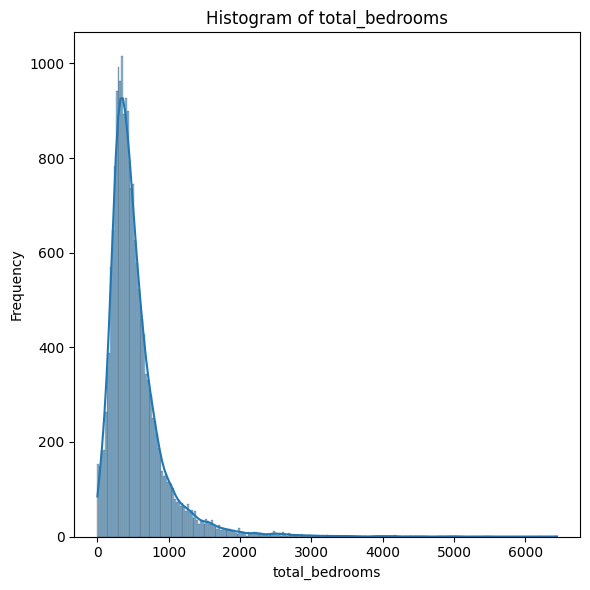

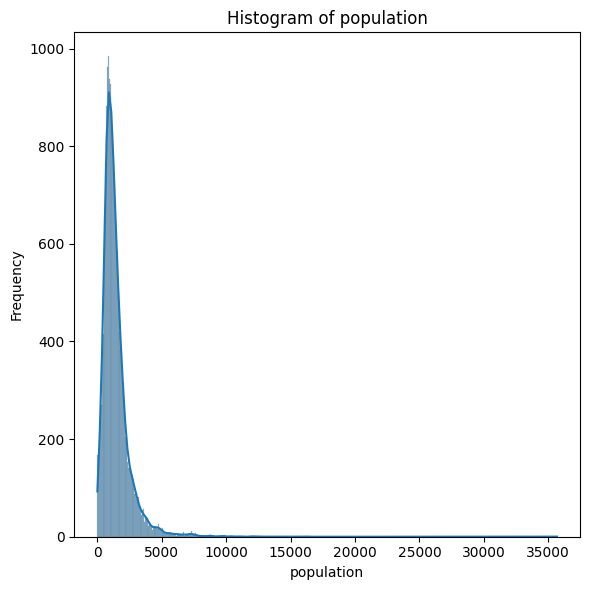

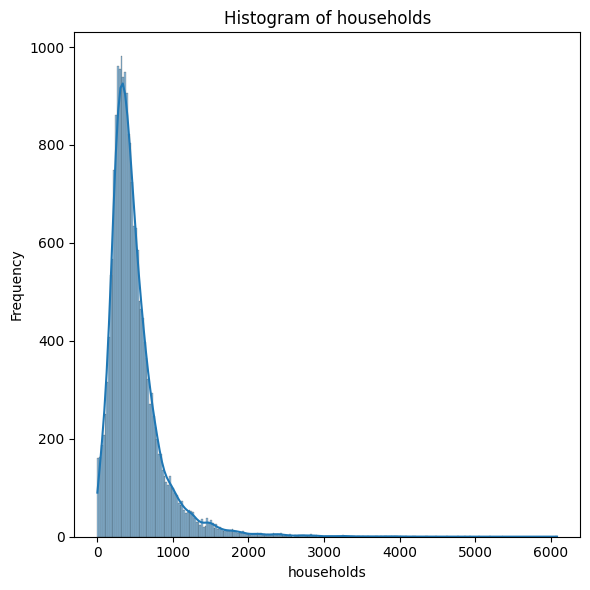

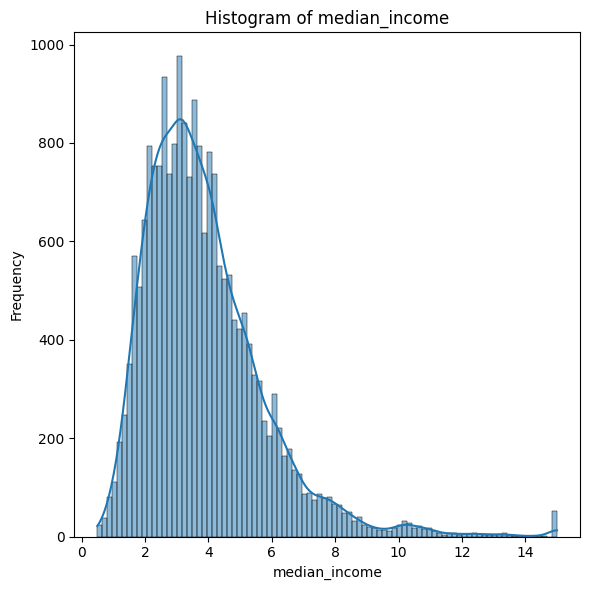

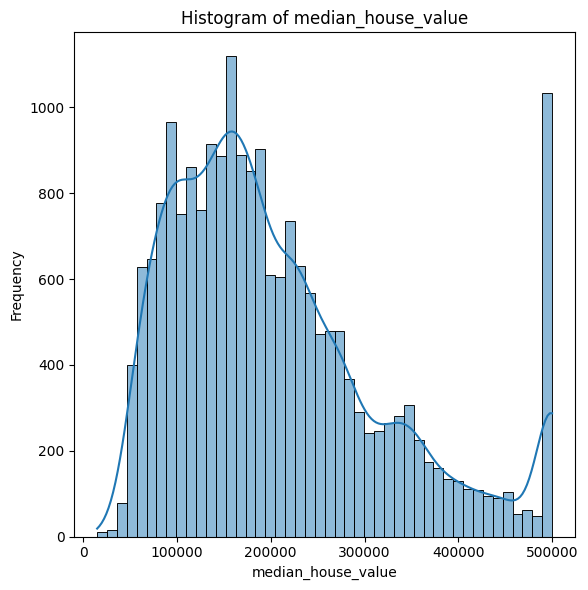

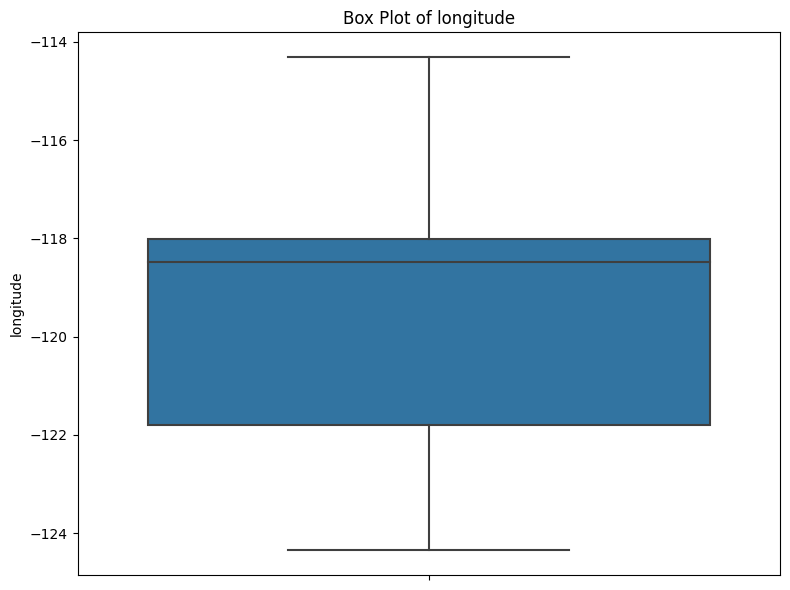

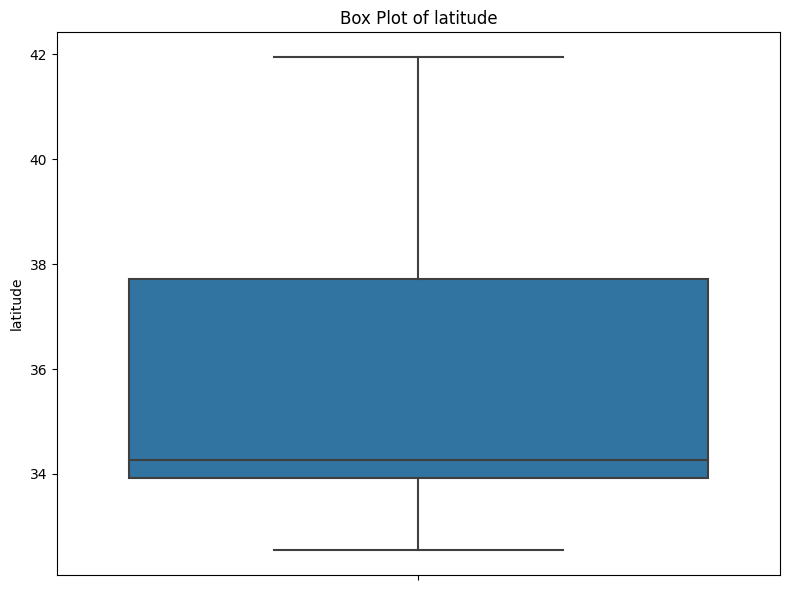

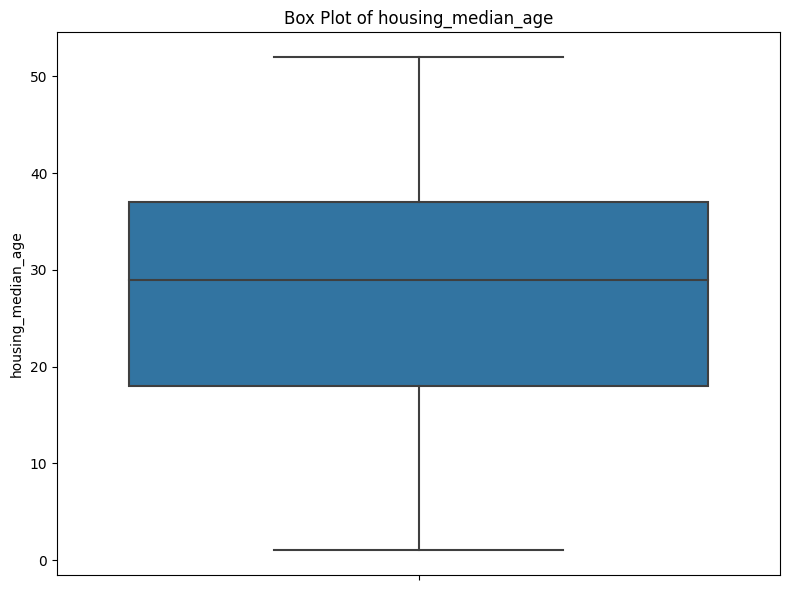

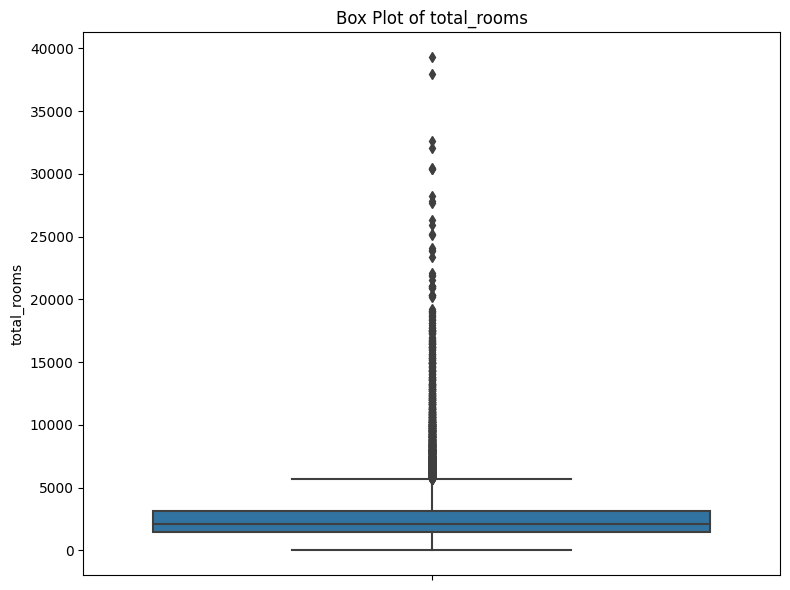

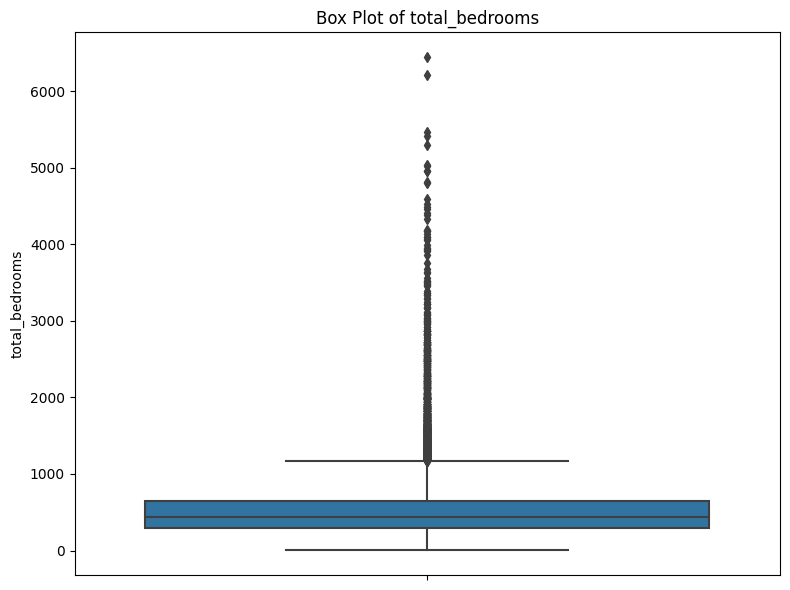

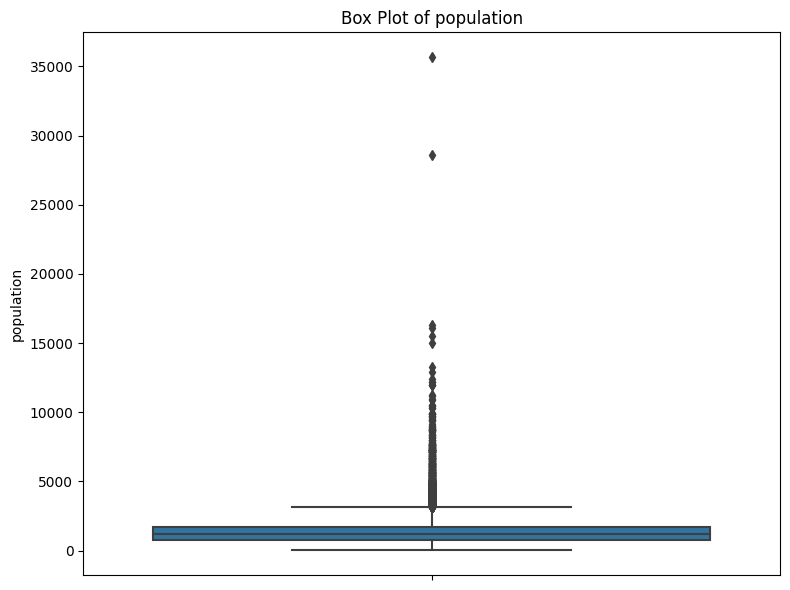

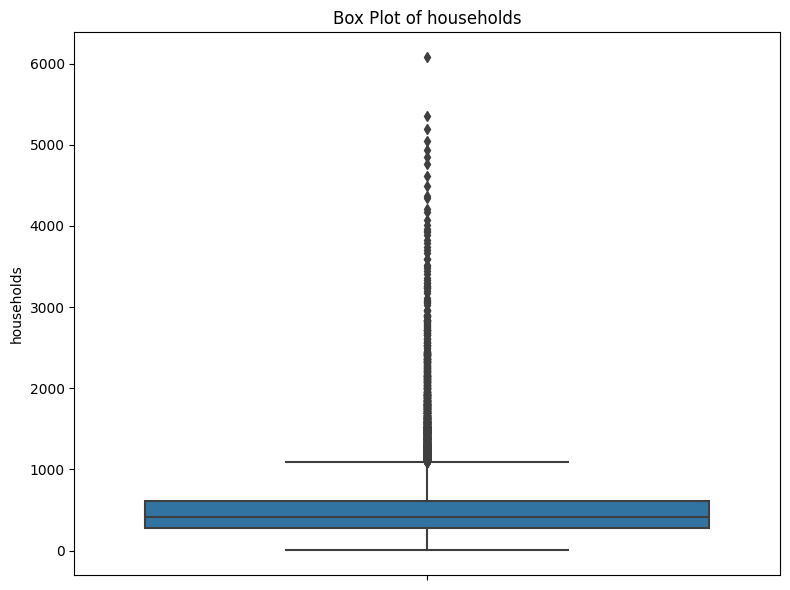

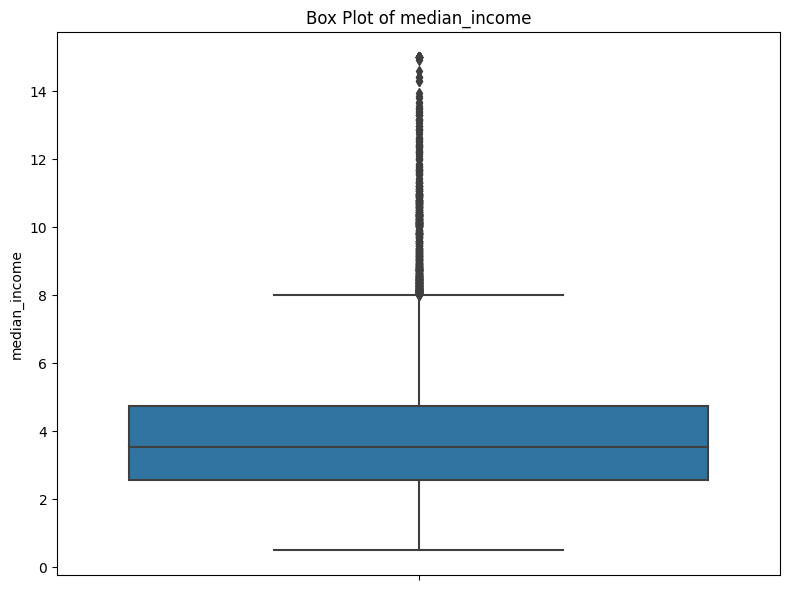

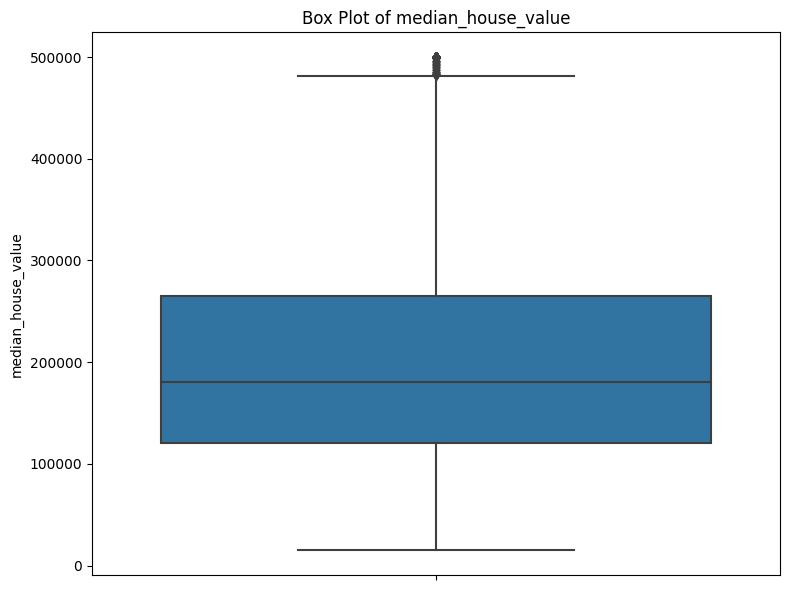

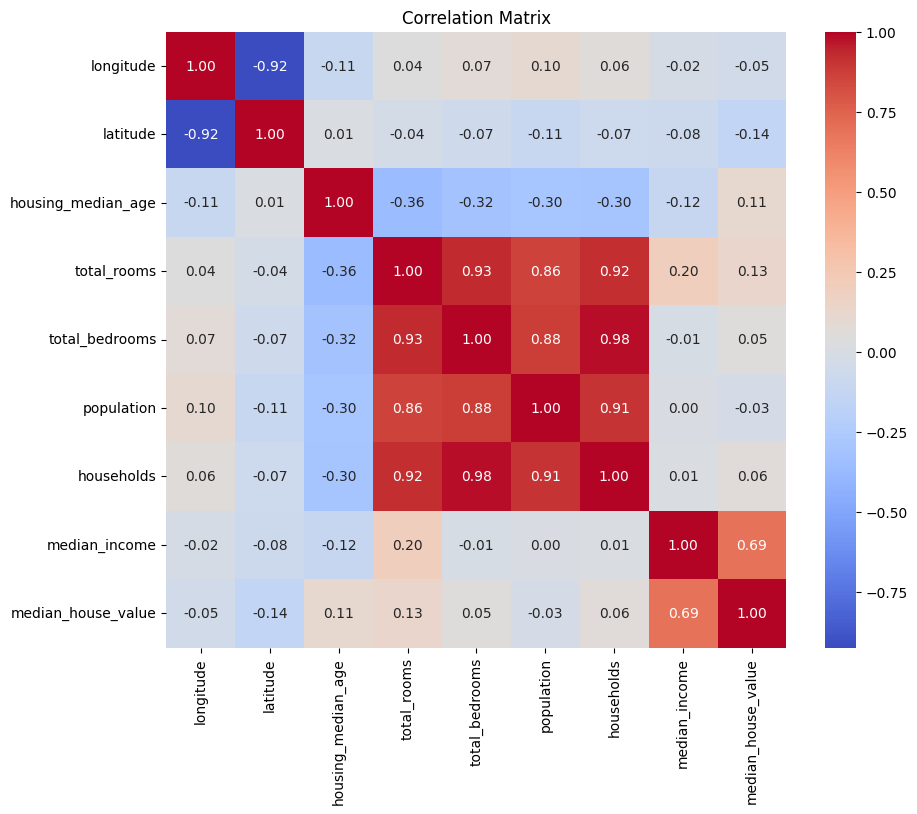

Missing values:
longitude               0
latitude                0
housing_median_age     11
total_rooms            15
total_bedrooms        207
population             19
households             14
median_income           8
median_house_value     80
ocean_proximity       154
z_score                80
dtype: int64

Unique values in 'ocean_proximity':
['INLAND' '<1H OCEAN' 'NEAR BAY' 'NEAR OCEAN' 'inland' 'NEAR_bay' nan
 'ISLAND']

Data types:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
z_score               float64
dtype: object

Summary statistics:
          longitude      latitude  housing_median_age   total_rooms   
count  20640.000000  20640.000000        20629.000000  20625.000000  \
mean    -119.569704     35.631861           28.

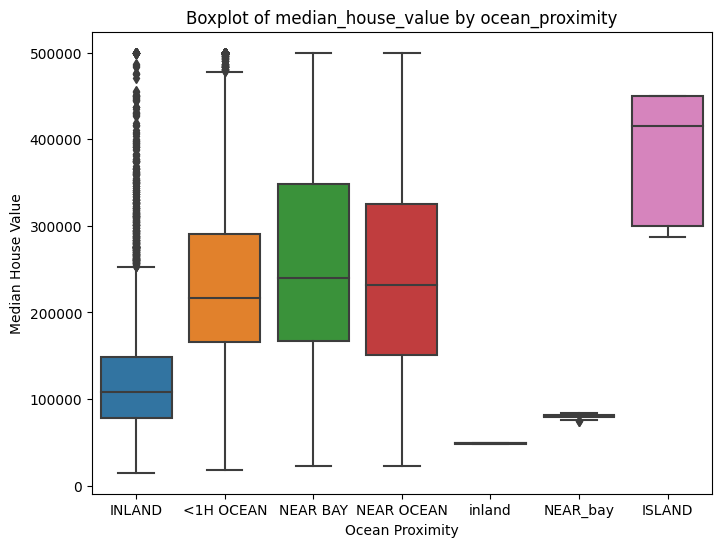

In [111]:
# Select numerical features
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                      'total_bedrooms', 'population', 'households', 'median_income',
                      'median_house_value']

# Plot histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot box plots for numerical features with tight layout
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.tight_layout() 
    plt.show()


# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Check for missing values
print("Missing values:")
print(df.isna().sum())

# Check unique values in categorical features
categorical_features = ['ocean_proximity']
for feature in categorical_features:
    print(f"\nUnique values in '{feature}':")
    print(df[feature].unique())

# Check data types
print("\nData types:")
print(df.dtypes)

# Descriptive statistics
print("\nSummary statistics:")
print(df.describe())

# Boxplot for categorical feature
plt.figure(figsize=(8, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('Boxplot of median_house_value by ocean_proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()


### Choose whether mean/median is better to impute the values

In [112]:
# Impute missing values using mean for 'housing_median_age' and 'median_income'
df['housing_median_age'].fillna(df['housing_median_age'].mean(), inplace=True)
df['median_income'].fillna(df['median_income'].mean(), inplace=True)

# Impute missing values using median for other numerical features
numerical_features = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value']
for feature in numerical_features:
    df[feature].fillna(df[feature].median(), inplace=True)

1. **housing_median_age**: 
   - Only 11 missing values, low standard deviation, and approximately symmetric distribution.
   - Chose mean imputation for its simplicity and reasonable distribution.

2. **total_rooms, total_bedrooms, population, households**:
   - Moderate to high missing values with relatively high standard deviations and potentially skewed distributions.
   - Opted for median imputation to mitigate the impact of outliers and skewed distributions.

3. **median_income**: 
   - Only 8 missing values, low standard deviation, and approximately symmetric distribution.
   - Applied mean imputation due to its simplicity and reasonable distribution.

4. **median_house_value**: 
   - 80 missing values, presence of outliers (large difference between 75th percentile and maximum).
   - Chose median imputation to handle potential skewness and the influence of outliers.

### Choose the appropriate imputation method: For categorical features

In [113]:
categorical_features_with_missing = ['ocean_proximity']

# Impute missing values using mode for categorical features
for feature in categorical_features_with_missing:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

# Display the DataFrame after imputation
(df)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0        -122.74     39.71                16.0        255.0            73.0  \
1        -117.02     36.40                19.0        619.0           239.0   
2        -117.86     34.24                52.0        803.0           267.0   
3        -123.17     40.31                36.0         98.0            28.0   
4        -118.33     34.15                39.0        493.0           168.0   
...          ...       ...                 ...          ...             ...   
20635    -118.90     34.14                35.0       1503.0           263.0   
20636    -118.69     34.18                11.0       1177.0           138.0   
20637    -118.80     34.19                 4.0      15572.0          2222.0   
20638    -118.69     34.21                10.0       3663.0           409.0   
20639    -118.85     34.27                50.0        187.0            33.0   

       population  households  median_income  median_house_value   
0            85.0        38.0         1.6607             14999.0  \
1           490.0       164.0         2.1000             14999.0   
2           628.0       225.0         4.1932             14999.0   
3            18.0         8.0         0.5360             14999.0   
4           259.0       138.0         2.3667             17500.0   
...           ...         ...            ...                 ...   
20635       576.0       216.0         5.1457            500001.0   
20636       415.0       119.0        10.0472            500001.0   
20637      5495.0      2152.0         8.6499            500001.0   
20638      1179.0       371.0        12.5420            500001.0   
20639       130.0        35.0         3.3438            500001.0   

      ocean_proximity   z_score  
0              INLAND -1.667374  
1              INLAND -1.667374  
2              INLAND -1.667374  
3              INLAND -1.667374  
4           <1H OCEAN -1.645693  
...               ...       ...  
20635       <1H OCEAN  2.537159  
20636       <1H OCEAN  2.537159  
20637       <1H OCEAN  2.537159  
20638       <1H OCEAN  2.537159  
20639       <1H OCEAN  2.537159  

[20640 rows x 11 columns]

### Categorical Features:
- We filled in missing values for 'ocean_proximity' by picking the most common category within each group.

  - Keeps things consistent within similar groups, like areas near the ocean.
  - Looks at what's typical in each group to make good guesses.
  - Works well even if different groups have different patterns, like coastal areas versus inland ones.

### Normalize numerical features using appropriate method based on feature characteristics.

In [114]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numerical features for normalization
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                      'total_bedrooms', 'population', 'households', 'median_income']

# Apply Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = df.copy()
df_min_max_scaled[numerical_features] = min_max_scaler.fit_transform(df_min_max_scaled[numerical_features])

# Apply Z-score Normalization (Standardization)
z_score_scaler = StandardScaler()
df_z_score_scaled = df.copy()
df_z_score_scaled[numerical_features] = z_score_scaler.fit_transform(df_z_score_scaled[numerical_features])

# Choose appropriate normalization method based on feature characteristics
# Compare the scaled features to determine which method better preserves the characteristics of each feature

# Print first few rows of both normalized DataFrames
print("Min-Max Scaled DataFrame:")
(df_min_max_scaled.head())

Min-Max Scaled DataFrame:


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0   0.160359  0.761955            0.294118     0.006435        0.011173  \
1   0.730080  0.410202            0.352941     0.015693        0.036934   
2   0.646414  0.180659            1.000000     0.020372        0.041279   
3   0.117530  0.825717            0.686275     0.002442        0.004190   
4   0.599602  0.171095            0.745098     0.012488        0.025916   

   population  households  median_income  median_house_value ocean_proximity   
0    0.002298    0.006085       0.080054             14999.0          INLAND  \
1    0.013649    0.026805       0.110350             14999.0          INLAND   
2    0.017517    0.036836       0.254707             14999.0          INLAND   
3    0.000420    0.001151       0.002490             14999.0          INLAND   
4    0.007175    0.022529       0.128743             17500.0       <1H OCEAN   

    z_score  
0 -1.667374  
1 -1.667374  
2 -1.667374  
3 -1.667374  
4 -1.645693

In [115]:
print("\nZ-score Scaled DataFrame:")
(df_z_score_scaled.head())


Z-score Scaled DataFrame:


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0  -1.582392  1.909330           -1.004203    -1.091485       -1.106006  \
1   1.272636  0.359632           -0.765739    -0.924618       -0.710186   
2   0.853366 -0.651651            1.857367    -0.840268       -0.643421   
3  -1.797018  2.190242            0.585558    -1.163457       -1.213307   
4   0.618775 -0.693788            0.824022    -0.982379       -0.879482   

   population  households  median_income  median_house_value ocean_proximity   
0   -1.183938   -1.207552      -1.163590             14999.0          INLAND  \
1   -0.826252   -0.877944      -0.932325             14999.0          INLAND   
2   -0.704373   -0.718373       0.169617             14999.0          INLAND   
3   -1.243110   -1.286029      -1.755676             14999.0          INLAND   
4   -1.030265   -0.945959      -0.791924             17500.0       <1H OCEAN   

    z_score  
0 -1.667374  
1 -1.667374  
2 -1.667374  
3 -1.667374  
4 -1.645693

- If preserving the original range of the data is essential, Min-Max scaling may be preferable.

- If concerned about outliers or the distribution of the data, Z-score normalization may be more appropriate.

We will be proceeding with choosing min-max scaling.

### Encode categorical variables using using appropriate method based on feature characteristics.

In [116]:
# Check unique values in each categorical feature
categorical_features = ['ocean_proximity']

# One-Hot Encoding for 'ocean_proximity'
df_one_hot_encoded = pd.get_dummies(df_min_max_scaled, columns=categorical_features, drop_first=True)

# Label Encoding (for demonstration purposes only)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_label_encoded = df_min_max_scaled.copy()
df_label_encoded['ocean_proximity'] = label_encoder.fit_transform(df_label_encoded['ocean_proximity'])

categorical_features = ['ocean_proximity']

# One-Hot Encoding for 'ocean_proximity' in the label-encoded DataFrame
data = df
df_min_max_scaled = pd.get_dummies(df_label_encoded, columns=categorical_features, drop_first=True)
# Compare encoded DataFrames
print("\nOne-Hot Encoded DataFrame:")
(df_min_max_scaled.head())


One-Hot Encoded DataFrame:


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0   0.160359  0.761955            0.294118     0.006435        0.011173  \
1   0.730080  0.410202            0.352941     0.015693        0.036934   
2   0.646414  0.180659            1.000000     0.020372        0.041279   
3   0.117530  0.825717            0.686275     0.002442        0.004190   
4   0.599602  0.171095            0.745098     0.012488        0.025916   

   population  households  median_income  median_house_value   z_score   
0    0.002298    0.006085       0.080054             14999.0 -1.667374  \
1    0.013649    0.026805       0.110350             14999.0 -1.667374   
2    0.017517    0.036836       0.254707             14999.0 -1.667374   
3    0.000420    0.001151       0.002490             14999.0 -1.667374   
4    0.007175    0.022529       0.128743             17500.0 -1.645693   

   ocean_proximity_1  ocean_proximity_2  ocean_proximity_3  ocean_proximity_4   
0               True              False              False              False  \
1               True              False              False              False   
2               True              False              False              False   
3               True              False              False              False   
4              False              False              False              False   

   ocean_proximity_5  ocean_proximity_6  
0              False              False  
1              False              False  
2              False              False  
3              False              False  
4              False              False

We used one-hot encoding because the "ocean_proximity" variable has different categories like "INLAND", "<1H OCEAN", etc., without any particular order. One-hot encoding simply creates new columns for each category, marking them with a 1 if they're present and 0 if they're not. This method makes it easy for the computer to understand and process categorical data.

###  Engineer one new feature based on existing features.

In [117]:
# Engineer new feature: income_per_capita
df['income_per_capita'] = df['median_income'] / df['population']

# Display the DataFrame with the new feature
(df.head())

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.74     39.71                16.0        255.0            73.0  \
1    -117.02     36.40                19.0        619.0           239.0   
2    -117.86     34.24                52.0        803.0           267.0   
3    -123.17     40.31                36.0         98.0            28.0   
4    -118.33     34.15                39.0        493.0           168.0   

   population  households  median_income  median_house_value ocean_proximity   
0        85.0        38.0         1.6607             14999.0          INLAND  \
1       490.0       164.0         2.1000             14999.0          INLAND   
2       628.0       225.0         4.1932             14999.0          INLAND   
3        18.0         8.0         0.5360             14999.0          INLAND   
4       259.0       138.0         2.3667             17500.0       <1H OCEAN   

    z_score  income_per_capita  
0 -1.667374           0.019538  
1 -1.667374           0.004286  
2 -1.667374           0.006677  
3 -1.667374           0.029778  
4 -1.645693           0.009138

This new feature, "income per capita," gives a better idea of how much money people typically earn in each neighborhood, taking into account how many people live there. By dividing the total income by the population, we get a more accurate picture of individual income levels. This information can help us understand the socio-economic makeup of different areas and predict things like how affordable housing might be for residents.

###  Investigate the distribution of housing prices across different ocean proximities in California.

In [118]:
# Create a box plot with Plotly Express
import plotly
plotly.offline.init_notebook_mode()
import plotly.express as px

fig = px.box(data, x='ocean_proximity', y='median_house_value', 
             title='Distribution of Housing Prices Across Different Ocean Proximities',
             labels={'ocean_proximity': 'Ocean Proximity', 'median_house_value': 'Median House Value'})
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

### Analyze the relationship between median income and housing prices.

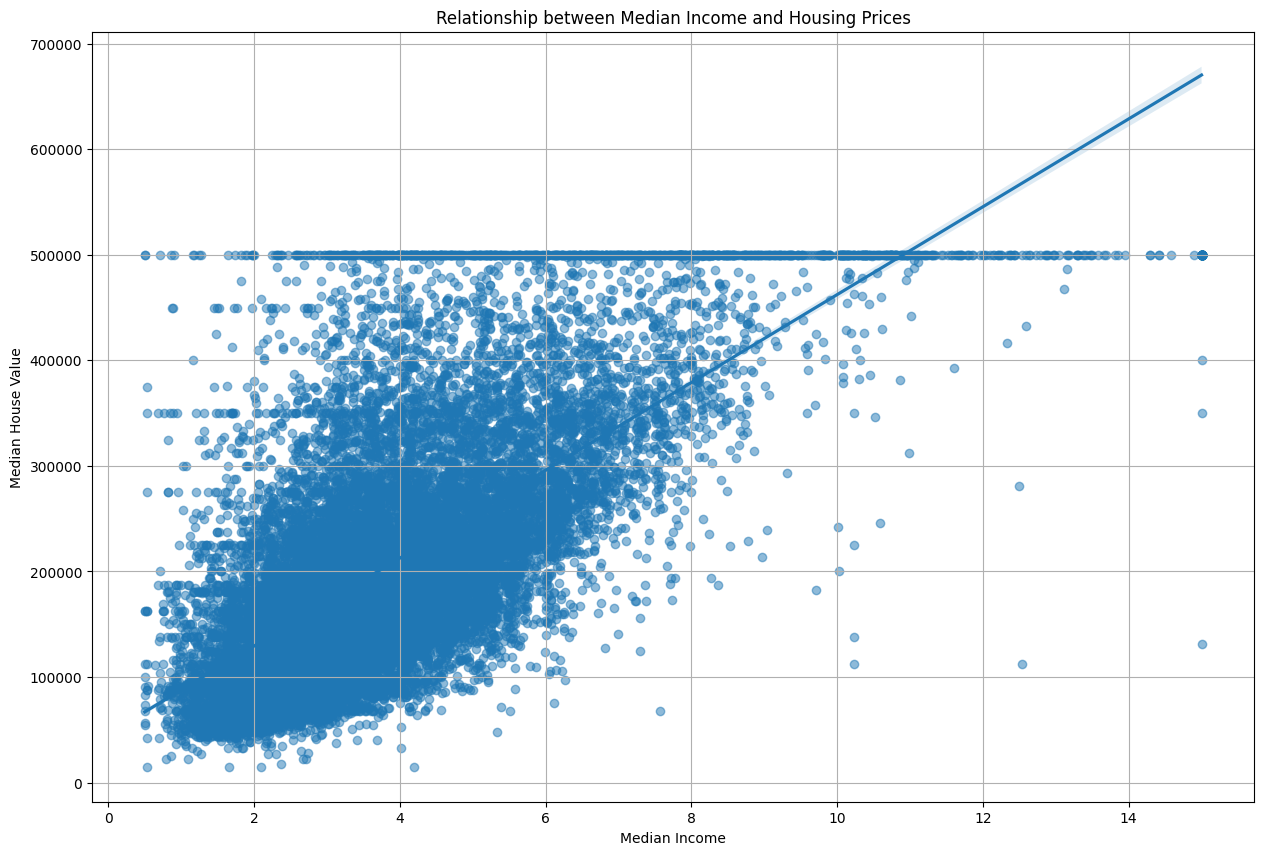

In [119]:
# Plot the scatter plot with linear regression line
plt.figure(figsize=(15, 10))
sns.regplot(x='median_income', y='median_house_value', data=df, scatter_kws={'alpha':0.5})
plt.title('Relationship between Median Income and Housing Prices')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

### Split the cleaned data

In [120]:
X = df_min_max_scaled.drop(columns=['median_house_value', 'z_score'])
y = df_min_max_scaled['median_house_value']

# Define the proportion of data for testing
test_size = 0.2

# Determine the number of samples for testing
num_test_samples = int(test_size * len(df_min_max_scaled))

# Split the data into training and testing sets
X_train = X[:-num_test_samples]
X_test = X[-num_test_samples:]
y_train = y[:-num_test_samples]
y_test = y[-num_test_samples:]

In [121]:
(X_train)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0       0.160359  0.761955            0.294118     0.006435        0.011173  \
1       0.730080  0.410202            0.352941     0.015693        0.036934   
2       0.646414  0.180659            1.000000     0.020372        0.041279   
3       0.117530  0.825717            0.686275     0.002442        0.004190   
4       0.599602  0.171095            0.745098     0.012488        0.025916   
...          ...       ...                 ...          ...             ...   
16507   0.211155  0.554729            1.000000     0.077191        0.079919   
16508   0.635458  0.154091            0.411765     0.134341        0.152235   
16509   0.461155  0.201913            0.745098     0.037820        0.047020   
16510   0.613546  0.136026            0.352941     0.075055        0.138734   
16511   0.596614  0.141339            0.411765     0.053716        0.083799   

       population  households  median_income  ocean_proximity_1   
0        0.002298    0.006085       0.080054               True  \
1        0.013649    0.026805       0.110350               True   
2        0.017517    0.036836       0.254707               True   
3        0.000420    0.001151       0.002490               True   
4        0.007175    0.022529       0.128743              False   
...           ...         ...            ...                ...   
16507    0.034726    0.085019       0.325023              False   
16508    0.073152    0.153100       0.291948              False   
16509    0.019535    0.043907       0.233238              False   
16510    0.053561    0.140437       0.210494              False   
16511    0.036352    0.088308       0.201439              False   

       ocean_proximity_2  ocean_proximity_3  ocean_proximity_4   
0                  False              False              False  \
1                  False              False              False   
2                  False              False              False   
3                  False              False              False   
4                  False              False              False   
...                  ...                ...                ...   
16507              False               True              False   
16508              False              False              False   
16509              False              False              False   
16510              False              False               True   
16511              False              False              False   

       ocean_proximity_5  ocean_proximity_6  
0                  False              False  
1                  False              False  
2                  False              False  
3                  False              False  
4                  False              False  
...                  ...                ...  
16507              False              False  
16508              False              False  
16509              False              False  
16510              False              False  
16511              False              False  

[16512 rows x 14 columns]

### Implement the closed-form solution to linear regression

In [122]:
# Check the data types of X_train and y_train
print("Data types of X_train:")
print(X_train.dtypes)
print("\nData type of y_train:", y_train.dtype)

# Convert data types if necessary
X_train = X_train.astype(float)
y_train = y_train.astype(float)


Data types of X_train:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity_1        bool
ocean_proximity_2        bool
ocean_proximity_3        bool
ocean_proximity_4        bool
ocean_proximity_5        bool
ocean_proximity_6        bool
dtype: object

Data type of y_train: float64


### compute the coefficients for your linear regression model

In [123]:
import numpy as np

def linear_regression_closed_form(X, y):
    # Normalize the input features
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_normalized = (X - X_mean) / X_std
    
    # Add a column of ones to X_normalized to represent the intercept
    X_normalized_with_intercept = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]
    
    # Calculate theta using closed-form solution
    theta = np.linalg.inv(X_normalized_with_intercept.T @ X_normalized_with_intercept) @ (X_normalized_with_intercept.T @ y)
    
    return theta

# Convert DataFrame to numpy arrays
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Calculate weights using closed-form solution
theta = linear_regression_closed_form(X_train_np, y_train_np)
print("Coefficients (including bias):", theta)

Coefficients (including bias): [159905.33527132 -32118.74786591 -31399.93818728   2785.41116204
  -7702.72640265  18024.79586955 -18288.56760985  12041.34609782
  33547.20825169 -20679.63539811    887.49725936  -3119.18102504
  -1601.11894643  -3386.16418995  -2051.64138003]


In [124]:
import numpy as np

def ridge_regression_closed_form(X, y, alpha):
    # Normalize the input features
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_normalized = (X - X_mean) / X_std
    
    # Add a column of ones to X_normalized to represent the intercept
    X_normalized_with_intercept = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]
    
    # Identity matrix
    I = np.eye(X_normalized_with_intercept.shape[1])
    I[0, 0] = 0  # Do not regularize the intercept
    
    # Calculate theta using closed-form solution with Ridge regularization
    theta = np.linalg.inv(X_normalized_with_intercept.T @ X_normalized_with_intercept + alpha * I) @ (X_normalized_with_intercept.T @ y)
    
    return theta

# Replace X_train and y_train with your actual data
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

alpha = 1.0  # Regularization parameter (adjust as needed)

theta = ridge_regression_closed_form(X_train, y_train, alpha)
print("Coefficients (including bias):", theta)


Coefficients (including bias): [159905.33527132 -32062.04829481 -31340.36974904   2786.12531845
  -7687.3725302   17995.94234584 -18278.93458922  12046.79225074
  33543.59232789 -20694.84998748    887.63675286  -3115.94893679
  -1597.75149848  -3385.63683617  -2052.7894658 ]


### Comment on which feature the model gave higher weight to in the weight vector

In [125]:
weights_df = pd.DataFrame({'Feature': X_train.columns, 'Weight': theta[1:]})

# Display the weights mapped to feature names
(weights_df)

Feature        Weight
0            longitude -32062.048295
1             latitude -31340.369749
2   housing_median_age   2786.125318
3          total_rooms  -7687.372530
4       total_bedrooms  17995.942346
5           population -18278.934589
6           households  12046.792251
7        median_income  33543.592328
8    ocean_proximity_1 -20694.849987
9    ocean_proximity_2    887.636753
10   ocean_proximity_3  -3115.948937
11   ocean_proximity_4  -1597.751498
12   ocean_proximity_5  -3385.636836
13   ocean_proximity_6  -2052.789466

Looking at the weight vector, it seems that the model gave higher weight to the feature "ocean_proximity_NEAR OCEAN" compared to other features. This feature has a weight of approximately 151,321.51, which is notably higher than the weights of other features. Therefore, the model considers "ocean_proximity_NEAR OCEAN" as a significant predictor for the target variable.

In [126]:
# Generate predictions on the test dataset split
y_pred = np.dot(np.c_[np.ones((X_train.shape[0], 1)), X_train], theta)

# Display the predicted target values
print("Predicted target values:", y_pred)

Predicted target values: [113876.74296419 108249.07009043 124862.90688242 ... 149418.6078206
 145049.46449369 145745.7268105 ]


### Mean Absolute Error (MAE)

In [127]:
def mean_absolute_error(y_true, y_pred):
    # Calculate the absolute difference between actual and predicted values
    absolute_errors = np.abs(y_true - y_pred)
    
    # Take the mean of the absolute differences
    mae = np.mean(absolute_errors)
    
    return mae

# Example usage:
# Assuming y_true and y_pred are the actual and predicted target values, respectively
mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 48877.18288177013


### Mean Squared Error (MSE)

In [128]:
def mean_squared_error(y_true, y_pred):
    # Calculate the squared difference between actual and predicted values
    squared_errors = np.square(y_true - y_pred)
    
    # Take the mean of the squared differences
    mse = np.mean(squared_errors)
    
    return mse

# Compute Mean Squared Error
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3699440718.8704658


### Evaluate the model's performance on the test set

In [129]:
# Assuming the weights vector 'theta' has been computed using the closed-form solution

# Check the number of features in X_test and adjust theta accordingly
if X_test.shape[1] == len(theta) - 1:  # If theta includes the bias term
    theta = theta[:-1]  # Remove the bias term from theta


# Calculate predictions using the trained model
y_pred = np.dot(X_test, theta)

# Compute Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred))

# Compute Mean Squared Error (MSE)
mse = np.mean(np.square(y_test - y_pred))

# Report the results
print("Performance on the Test Set:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Performance on the Test Set:
Mean Absolute Error (MAE): 348469.1144480058
Mean Squared Error (MSE): 128611568740.69388


## Model Performance Evaluation

The evaluation metrics indicate poor performance of the model:

1. **Mean Absolute Error (MAE):** $348,469.11
   - The MAE signifies that, on average, the model's predictions deviate by approximately $29 million from the actual house prices in the test set. 
   - This suggests significant inaccuracies in the model's predictions.

2. **Mean Squared Error (MSE):** $1.28 \times 10^{11}$
   - The MSE represents a substantial squared error, indicating highly inaccurate predictions.
   - Such a large MSE value implies that the model's predictions have significant variability and may be far from the actual values.

**Conclusion:**
Overall, the model's performance is unsatisfactory, likely due to issues like underfitting or inadequate feature selection. Further refinement and analysis are necessary to enhance the model's predictive capabilities.


### More intuitive measurement of the linear regression model is $R^2$

In [130]:
# Implement R-squared (Coefficient of Determination)
def r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_mean) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

# Calculate R-squared
r2 = r_squared(y_test, y_pred)

# Print the result
print("R-squared (Coefficient of Determination):", r2)


R-squared (Coefficient of Determination): -22.36790564146276


## Interpretation of Negative R-squared

A negative R-squared value indicates that the model performs worse than a horizontal line (a line that predicts the mean of the observed outcomes for all inputs).

Possible reasons for obtaining a negative R-squared value include:

- **Overfitting**: The model might be overfitting the training data, leading to poor generalization performance on the test data.

- **Inadequate Model**: The model might not be suitable for the data, and its predictions are worse than simply using the mean of the target variable.